In [1]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)): 
  ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import numpy as np

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [38]:
def batch_selector(x,y,loss,batch_size,mode="random"):
    if(mode=="random"):
        indices=np.random.choice(len(x),batch_size)
        return(x[indices],y[indices],indices)
    pp=loss.copy()**3#1.0/(0.0001+loss.copy())
    k=sum(pp<0)
    if(k!=0):
        h=k/len(pp)
        pp=pp/(sum(pp[pp<0]))*h
    pp[pp<0]=1/len(pp)
    #print(sum(p))
    #print(np.array(p))
    #print(batch_size)
    indices=np.random.choice(len(pp),batch_size,pp.tolist())
    return(x[indices],y[indices],indices)
    

In [65]:
import tensorflow as tf

In [66]:
x = tf.placeholder(tf.float32, [None, 784])

In [67]:
W = tf.Variable(tf.random_normal([784, 64]))
b = tf.Variable(tf.ones([64]))
y1 = tf.nn.sigmoid(tf.matmul(x, W) + b)
W1 = tf.Variable(tf.random_normal([64, 10]))
b1 = tf.Variable(tf.ones([10]))
y = tf.nn.softmax(tf.matmul(y1, W1) + b1)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy1 = (-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy=tf.reduce_mean(cross_entropy1)
train_step = tf.train.GradientDescentOptimizer(1.0).minimize(cross_entropy)

In [68]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [69]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
batch_size=100;p=np.array([-10.0]*len(mnist.train.labels));accumulator1=[]

In [70]:
print(p.shape)

(55000,)


In [71]:
for _ in range(1000):
    batch_xs, batch_ys,indices = batch_selector(mnist.train.images,mnist.train.labels,p,batch_size,'selective')
    loss=sess.run([cross_entropy1, train_step], feed_dict={x: batch_xs, y_: batch_ys})[0]
    p[indices]=loss#############################################################################################
    if _%10==0:
        aa,bb=sess.run([cross_entropy1,cross_entropy], feed_dict={x: mnist.train.images, y_: mnist.train.labels})
        p=aa
        accumulator1=accumulator1+[bb]

In [72]:
print(accumulator1)

[6.7366843, 2.7325463, 1.8941069, 1.6154126, 1.3039062, 1.1244853, 0.97411156, 0.94159055, 0.8705858, 0.9004047, 0.80584514, 0.7545412, 0.7250635, 0.68886393, 0.6848963, 0.7393553, 0.67374855, 0.6340945, 0.6710259, 0.64072776, 0.65874356, 0.5703552, 0.56833166, 0.55800813, 0.5751517, 0.55003667, 0.55566895, 0.5359063, 0.5149375, 0.57023495, 0.5131902, 0.50993305, 0.51170397, 0.51447237, 0.5057069, 0.5095384, 0.4938961, 0.47894406, 0.49427062, 0.46356192, 0.46962568, 0.4658053, 0.44712472, 0.46263018, 0.47227806, 0.49170262, 0.44258684, 0.46888655, 0.42038384, 0.43597317, 0.41752565, 0.41460034, 0.4060464, 0.41853487, 0.40661526, 0.41143614, 0.4146669, 0.40181473, 0.4211684, 0.414114, 0.4532985, 0.42246008, 0.40998474, 0.38376343, 0.3962097, 0.37317243, 0.41253173, 0.39154986, 0.37909293, 0.3801583, 0.3728952, 0.3786352, 0.37620306, 0.37623423, 0.36269808, 0.3643412, 0.36515743, 0.37972474, 0.3752345, 0.3587858, 0.35180143, 0.34927925, 0.35338777, 0.34246606, 0.33973938, 0.34854174, 0.3

In [73]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
batch_size=100;p=np.array([-10.0]*len(mnist.train.labels));accumulator2=[]

In [74]:
for _ in range(1000):
    batch_xs, batch_ys,indices = batch_selector(mnist.train.images,mnist.train.labels,p,batch_size,'random')
    loss=sess.run([cross_entropy1, train_step], feed_dict={x: batch_xs, y_: batch_ys})[0]
    if _%10==0:
        accumulator2=accumulator2+[sess.run(cross_entropy, feed_dict={x: mnist.train.images, y_: mnist.train.labels})]

In [75]:
print(accumulator2)

[5.857157, 2.346411, 1.7031145, 1.4047523, 1.2162452, 1.067876, 0.9677779, 0.91254264, 0.84139866, 0.8094026, 0.7733439, 0.75679874, 0.7260946, 0.6804067, 0.66870797, 0.6454973, 0.64789987, 0.6334399, 0.6151453, 0.5863159, 0.5822089, 0.57896346, 0.56011033, 0.54979527, 0.5406302, 0.53727275, 0.52818066, 0.5390681, 0.5150174, 0.50671685, 0.49329492, 0.5008933, 0.48872775, 0.48163217, 0.47454232, 0.46664098, 0.4790593, 0.4708561, 0.46835035, 0.443561, 0.44574857, 0.43702346, 0.45491913, 0.43887556, 0.44349575, 0.43038046, 0.43664497, 0.4193257, 0.43684936, 0.4294219, 0.42105782, 0.40990895, 0.40737528, 0.40337646, 0.41266933, 0.40098742, 0.4039665, 0.3993326, 0.38936833, 0.38632506, 0.38134846, 0.3871002, 0.38994223, 0.3876949, 0.37671405, 0.37623793, 0.37893832, 0.3753566, 0.37908515, 0.3724818, 0.36401564, 0.36487794, 0.36287433, 0.35766494, 0.3729366, 0.36452082, 0.36126268, 0.35060313, 0.35478476, 0.3501411, 0.34710753, 0.35141438, 0.355838, 0.34816933, 0.34632614, 0.33971095, 0.3441

In [76]:
from matplotlib import pyplot as plt

In [77]:
plt.scatter(np.arange(len(accumulator1)),accumulator1,s=0.1)

In [78]:
plt.scatter(np.arange(len(accumulator2)),accumulator2,s=0.1)

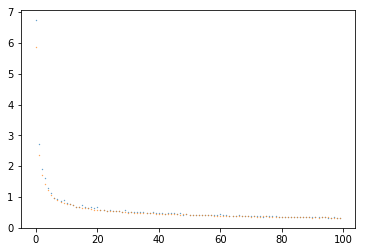

In [79]:
plt.show()

In [62]:
plt.show()

In [63]:
sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.888

In [22]:
import cv2

In [ ]:
len(mnist.train.labels)

In [82]:
def r(n):
    return(2**(2*n*(n-1)))


In [83]:
for e in range(10):
    print(r(e))

1
1
16
4096
16777216
1099511627776
1152921504606846976
19342813113834066795298816
5192296858534827628530496329220096
22300745198530623141535718272648361505980416


In [97]:
0

0